In [94]:
%load_ext autoreload
%autoreload 2
# Import packages

import json, string

import folium
import requests
import geocoder
import pandas as pd

from folium import Map, Marker, GeoJson, LayerControl

%matplotlib inline

In [3]:
location = 'Dar es salam'
loc = geocoder.osm(location)

In [282]:
m = folium.Map(location=[loc.lat, loc.lng],
       zoom_start=20, max_zoom=40,
       tiles= 'https://api.mapbox.com/styles/v1/butlerbt/ck6h2wkc107jz1io8zgoqee80/tiles/256/{z}/{x}/{y}@2x?access_token=pk.eyJ1IjoiYnV0bGVyYnQiLCJhIjoiY2s2aDJqNzl2MDBqdDNqbWlzdWFqYjZnOCJ9.L4RJNdK2aqr6kHcHZxksXw',
       attr='Map data &copy; <a href="https://www.openstreetmap.org/">OpenStreetMap</a> contributors, <a href="https://creativecommons.org/licenses/by-sa/2.0/">CC-BY-SA</a>, Imagery © <a href="https://www.mapbox.com/">Mapbox</a>')
m.save('map.html')
m


In [283]:
import selenium.webdriver
# from phantomjs import Phantom
driver = selenium.webdriver.PhantomJS('phantomjs-2.1.1-macosx/bin/phantomjs')
driver.set_window_size(3000, 3000)  # choose a resolution
driver.get('map.html')
# You may need to add time.sleep(seconds) here
driver.save_screenshot('screenshot.png')

/Users/brentsair/anaconda3/envs/flask-env2/lib/python3.7/site-packages/selenium/webdriver/phantomjs/webdriver.py:49: UserWarning: Selenium support for PhantomJS has been deprecated, please use headless versions of Chrome or Firefox instead
  warnings.warn('Selenium support for PhantomJS has been deprecated, please use headless '


True

In [284]:
import src.inference as inf

In [308]:


import pickle
from fastai.vision import *
from fastai.callbacks import *
from skimage import io
from fastai.utils.collect_env import *
import torch 
from app import app
import matplotlib



def import_model():
    import src.inference_classes as inference_classes
    inference_learner = load_learner(
        path='src/', 
        file='single_chan_dice.pkl')
    return inference_learner



def prep_input(input_img):
    read_img = io.imread(input_img)
    t_img = Image(pil2tensor(read_img[:,:,:3],np.float32).div_(255))
    return t_img


def inference_masker(model, t_img):
    outputs = model.predict(t_img)
    inference_mask = image2np(outputs[2])
    inference_mask = (inference_mask*255).astype('uint8')
    inference_mask.flatten().resize(
    return inference_mask

def visualize_inference(inference_mask, input_img):
    
    fig, ax= plt.subplots(1,1, figsize=(10,10))
    ax.imshow(inference_mask[:,:,0], alpha=1)
    ax.axis('off')
    plt.savefig('static/mask.png', dpi = 500, pad_inches = 0)

    fig2, ax2= plt.subplots(1,1, figsize=(10,10))
    ax2.imshow(io.imread(input_img))
    ax2.axis('off')
    plt.set_cmap('hot')
    plt.savefig('static/img.png')


    
def make_prediction(input_image):
    learner = import_model()
    tens_img = prep_input(input_image)
    mask = inference_masker(learner, tens_img)
    visualize_inference(inference_mask=mask, input_img=input_image)
    


/Users/brentsair/anaconda3/envs/flask-env2/lib/python3.7/site-packages/torch/serialization.py:494: SourceChangeWarning: source code of class 'torch.nn.modules.container.ModuleList' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/Users/brentsair/anaconda3/envs/flask-env2/lib/python3.7/site-packages/torch/serialization.py:494: SourceChangeWarning: source code of class 'torch.nn.modules.container.Sequential' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/Users/brentsair/anaconda3/envs/flask-env2/lib/python3.7/site-packages/torch/serialization.py:494: SourceChangeWarning: source code of class 'torchvision.models.resnet.BasicBlo

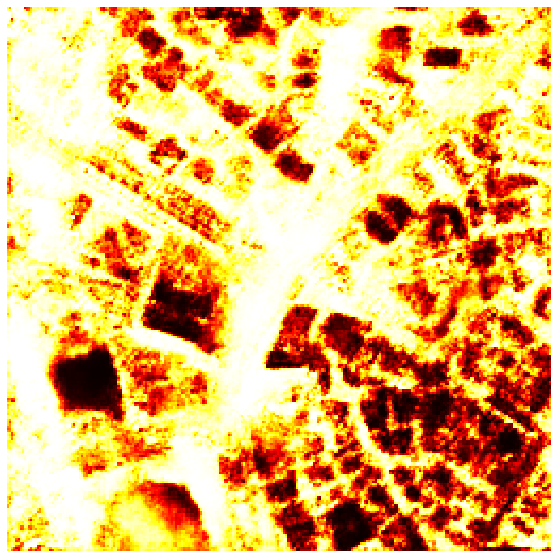

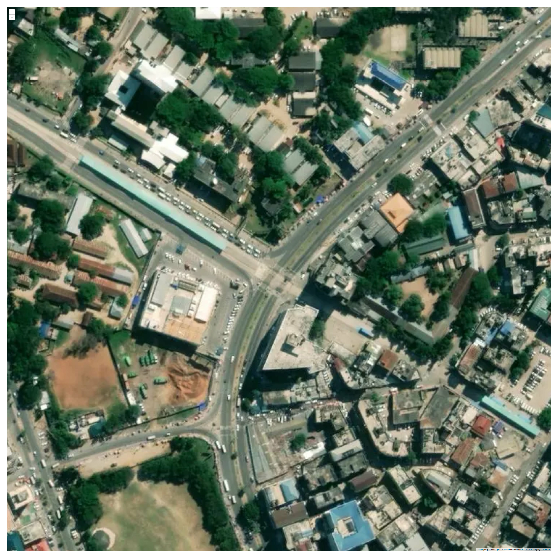

In [309]:
make_prediction('screenshot.png')

In [298]:
model = learner
outputs = model.predict(tens_img)
# pred_arr = np.array((preds[i][0].flatten()<0.5).int().reshape(256, 256)) # Thresh to play with
inference_mask = image2np(outputs[2]<.5)
inference_mask = (inference_mask*255).astype('uint8')



In [299]:
inference_mask[:,:,0]


array([[  0,   0,   0,   0, ...,   0,   0, 255,   0],
       [  0,   0,   0,   0, ..., 255,   0, 255,   0],
       [  0,   0,   0,   0, ...,   0,   0, 255,   0],
       [  0,   0,   0,   0, ...,   0,   0,   0,   0],
       ...,
       [  0,   0,   0,   0, ...,   0,   0,   0,   0],
       [  0,   0,   0,   0, ...,   0,   0,   0,   0],
       [  0,   0,   0,   0, ...,   0,   0, 255,   0],
       [  0,   0,   0, 255, ..., 255, 255, 255, 255]], dtype=uint8)

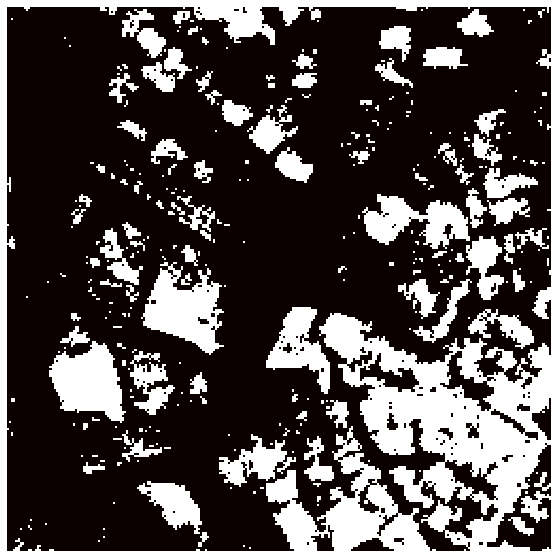

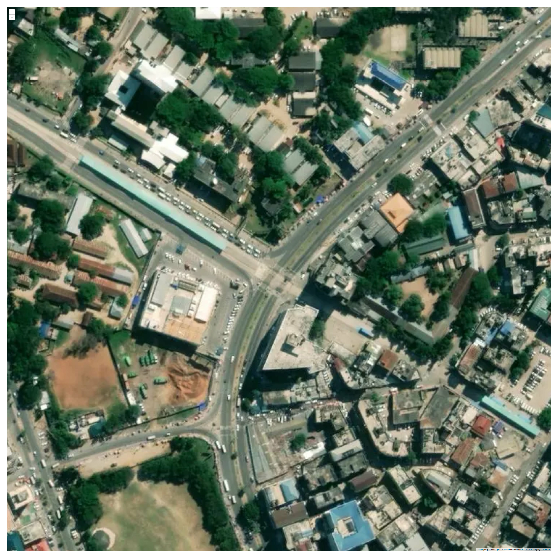

In [300]:
visualize_inference(inference_mask=inference_mask, input_img=input_image)

In [294]:
input_image='screenshot.png'
learn = import_model()
tens_img = prep_input('screenshot.png')
mask = inference_mask(learner, tens_img)
visualize_inference(inference_mask=mask, input_img=input_image)

/Users/brentsair/anaconda3/envs/flask-env2/lib/python3.7/site-packages/torch/serialization.py:494: SourceChangeWarning: source code of class 'torch.nn.modules.container.ModuleList' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/Users/brentsair/anaconda3/envs/flask-env2/lib/python3.7/site-packages/torch/serialization.py:494: SourceChangeWarning: source code of class 'torch.nn.modules.container.Sequential' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/Users/brentsair/anaconda3/envs/flask-env2/lib/python3.7/site-packages/torch/serialization.py:494: SourceChangeWarning: source code of class 'torchvision.models.resnet.BasicBlo

TypeError: 'numpy.ndarray' object is not callable

In [301]:

geoms = sol.vector.mask.mask_to_poly_geojson(inference_mask[:,:,0], min_area = 20, simplify=True, )

In [302]:
geoms

,geometry,value
0,"POLYGON ((80.000 2.000, 80.000 4.000, 78.000 4...",255.0
1,"POLYGON ((128.000 0.000, 128.000 2.000, 130.00...",255.0
2,"POLYGON ((220.000 1.000, 220.000 2.000, 219.00...",255.0
3,"POLYGON ((64.000 1.000, 64.000 2.000, 61.000 2...",255.0
4,"POLYGON ((88.000 0.000, 88.000 4.000, 89.000 4...",255.0
...,...,...
62,"POLYGON ((237.000 240.000, 237.000 241.000, 23...",255.0
63,"POLYGON ((203.000 232.000, 203.000 235.000, 20...",255.0
64,"POLYGON ((66.000 223.000, 66.000 225.000, 68.0...",255.0
65,"POLYGON ((146.000 246.000, 146.000 244.000, 14...",255.0


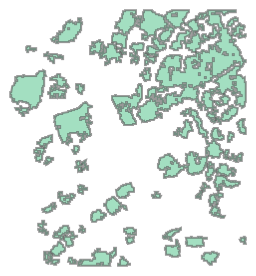

In [303]:
from shapely.ops import cascaded_union
cascaded_union(geoms['geometry'])